## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [ ]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
28416/50000 [================>.............] - ETA: 7s - loss: 2.0077 - accuracy: 0.2719

KeyboardInterrupt: 

In [6]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

NameError: name 'model' is not defined

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [12]:
## 資料前處理
def preproc_x2(x, flatten=True):
    x = 2*((x-x.min()) / (x.max()-x.min()))-1.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [13]:
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

# 資料前處理 - X 標準化
x_train = preproc_x2(x_train)
x_test = preproc_x2(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
model = build_mlp(input_shape=x_train.shape[1:],num_neurons=[512,512,256,256,128,128,64,64])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [16]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 362us/step - loss: 1.7392 - accuracy: 0.3774 - val_loss: 1.5378 - val_accuracy: 0.4601
Epoch 2/100
50000/50000 [==============================] - 19s 371us/step - loss: 1.4894 - accuracy: 0.4725 - val_loss: 1.4705 - val_accuracy: 0.4824
Epoch 3/100
50000/50000 [==============================] - 16s 328us/step - loss: 1.3710 - accuracy: 0.5186 - val_loss: 1.4289 - val_accuracy: 0.4948
Epoch 4/100
50000/50000 [==============================] - 16s 328us/step - loss: 1.2687 - accuracy: 0.5526 - val_loss: 1.3645 - val_accuracy: 0.5175
Epoch 5/100
50000/50000 [==============================] - 17s 335us/step - loss: 1.1884 - accuracy: 0.5799 - val_loss: 1.3467 - val_accuracy: 0.5257
Epoch 6/100
50000/50000 [==============================] - 18s 366us/step - loss: 1.0958 - accuracy: 0.6116 - val_loss: 1.3848 - val_accuracy: 0.5250
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 16s 311us/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 3.1378 - val_accuracy: 0.5366
Epoch 56/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.0811 - accuracy: 0.9734 - val_loss: 3.1240 - val_accuracy: 0.5460
Epoch 57/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 3.0547 - val_accuracy: 0.5422
Epoch 58/100
50000/50000 [==============================] - 16s 315us/step - loss: 0.0798 - accuracy: 0.9737 - val_loss: 3.1426 - val_accuracy: 0.5393
Epoch 59/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.0746 - accuracy: 0.9757 - val_loss: 3.3769 - val_accuracy: 0.5336
Epoch 60/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.0804 - accuracy: 0.9743 - val_loss: 3.1132 - val_accuracy: 0.5353
Epoch 61/100
50000/50000 [==============================] - 16s 312us/step - loss: 0.0765 - ac

In [18]:
train_loss=model.history.history['loss']
valid_loss=model.history.history['val_loss']
train_acc=model.history.history['accuracy']
valid_acc=model.history.history['val_accuracy']

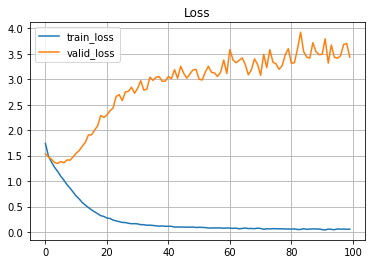

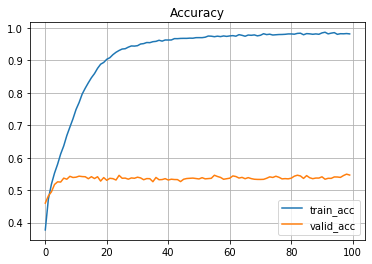

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(EPOCHS),train_loss,'-',label='train_loss')
plt.plot(range(EPOCHS),valid_loss,'-',label='valid_loss')
plt.legend()
plt.title('Loss')
plt.grid()
plt.show()

plt.plot(range(EPOCHS),train_acc,'-',label='train_acc')
plt.plot(range(EPOCHS),valid_acc,'-',label='valid_acc')
plt.legend()
plt.title('Accuracy')
plt.grid()
plt.show()